In [9]:
# f(x) = x^2 
def grad(x):
    return 16*x**3 - 3/2*x**2 - 2*x

In [10]:
def check(x):
    return 4*x** 4 - 1/2*x**3 - x**2

In [23]:
lamb = 0.3
s = []
anpha = 0.000003
beta = 0.5

x_0 = 3
el = 1e-15

for _ in range (1500):
    if check(x_0 - lamb*grad(x_0)) > (check(x_0) - anpha * lamb * (grad(x_0) ** 2)):
        print( f" {check(x_0 - lamb*grad(x_0))}     {check(x_0) - anpha * lamb * (grad(x_0) ** 2)}")
        lamb = beta * lamb
        break
    else:
        x_0 = x_0 - lamb * grad(x_0)

print(x_0, lamb)

 851236932.1640625     301.346859375
3 0.15


SUB GRADIENT

Bước 1: Chọn điểm xuất phát X[0].
        Cho trước giá trị ɛ.


Bước 2: Lặp quá trình
     \- Cập nhật X[t + 1] = X[t] - lamb[t]. S_f(X[t])
        với S_f(X[t]) là kí hiệu của Sub Gradient
     \- Kiểm tra đk
        ||X[t + 1] - X[t] || < ɛ

Minimum found at x* = (2.0000000009702332, 2.0000000015698705)


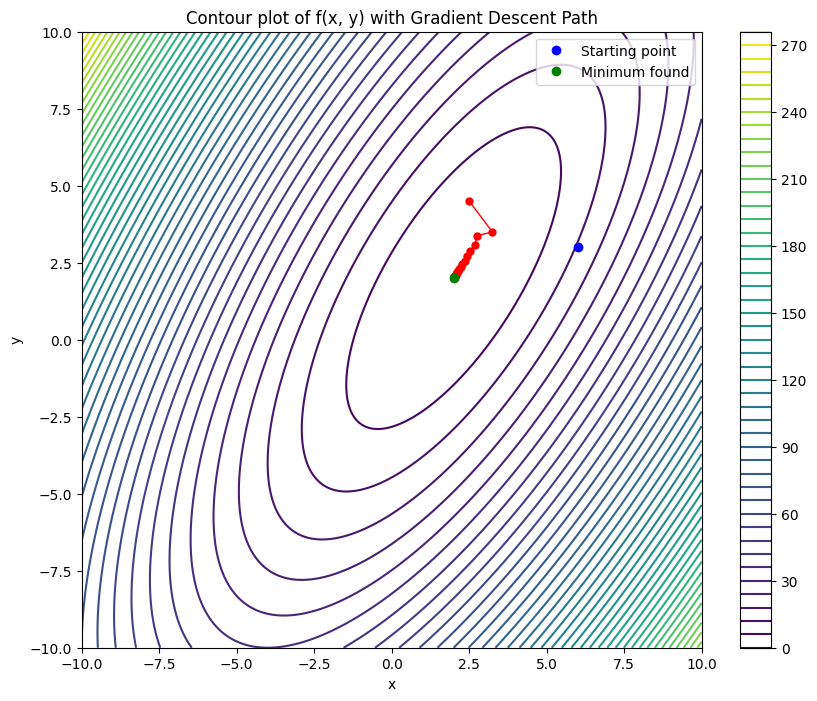

In [47]:
# f(x,y) = (x - 2)^2 - (x-2)(y-2) + 1/2(y-2)^2
# Sử dụng GDM methods để tìm x* sao ho f(x) đạt min
# -> Tính x* = argmin f(x)  x thuộc R
# X = (x,y)
# Chọn X = (-5, - 2)

import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x, y):
    return (x - 2)**2 - (x - 2)*(y - 2) + 0.5*(y - 2)**2

# Define the gradient of the function
def gradient(x, y):
    df_dx = 2*(x - 2) - (y - 2)
    df_dy = (y - 2) - (x - 2)
    return np.array([df_dx, df_dy])

# Gradient Descent Method
def gradient_descent(starting_point, learning_rate, iterations):
    x, y = starting_point
    history = []
    for _ in range(iterations):
        grad = gradient(x, y)
        x -= learning_rate * grad[0]
        y -= learning_rate * grad[1]
    
        history.append((x, y))
    return x, y, history

# Parameters for gradient descent
starting_point = np.array([6, 3])
learning_rate = 0.5
iterations = 100

# Perform gradient descent
x_star, y_star, history = gradient_descent(starting_point, learning_rate, iterations)

# Print the result
print(f"Minimum found at x* = ({x_star}, {y_star})")

# Plotting
a = np.linspace(-10, 10, 400)
b = np.linspace(-10, 10, 400)
a, b = np.meshgrid(a, b)
z = f(a, b)

# Create the contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(a, b, z, levels=50, cmap='viridis')
plt.colorbar(contour)

# Plot the path of gradient descent
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], 'ro-', markersize=5, linewidth=1)

# Mark the starting point and the minimum found
plt.plot(starting_point[0], starting_point[1], 'bo', label='Starting point')
plt.plot(x_star, y_star, 'go', label='Minimum found')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour plot of f(x, y) with Gradient Descent Path')
plt.legend()
plt.show()


